In [1]:
""" Initial Notebook to demonstrate the power 
    of the Cutout technique.
    Prev step for further implementation in 
    NASNet Architectures to try to achieve SOTA results
"""


import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Using TensorFlow backend.


<IPython.core.display.Javascript object>


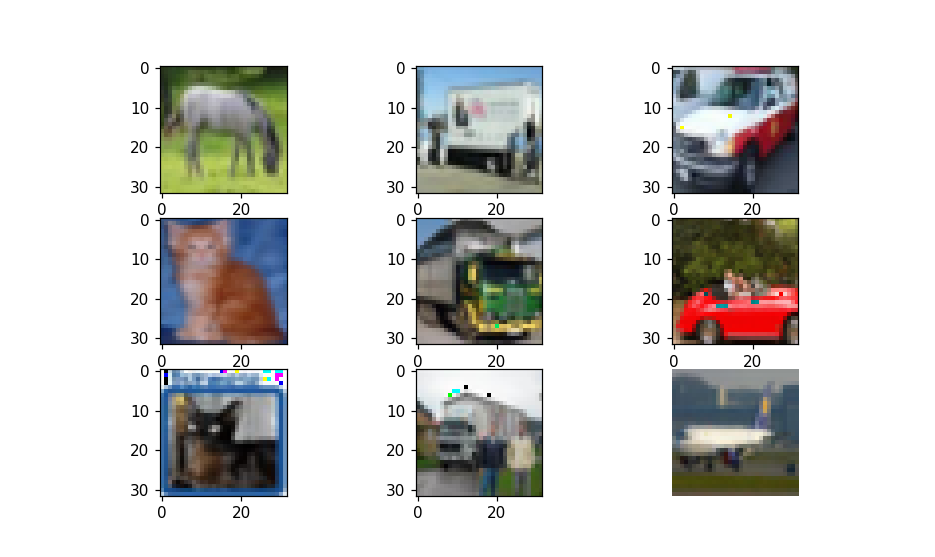

In [2]:
%matplotlib notebook
def plot():
    cols, rows = 3, 3
    #Visualizing CIFAR 10
    fig, axes1 = plt.subplots(cols,rows,figsize=(7,7))
    for j in range(cols):
        for i in range(rows):
            axes1[j][i].imshow(255-x_train[np.random.randint(100)], interpolation="nearest")
            
    plt.axis("off")
    plt.show()
    
plot()

In [3]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p: return input_img

        while True:
            # Calculate the dimensions of the crop
            w = int(img_w * s_l)
            h = int(img_h * s_h)
            #Select starting coords
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)
            # If crop is in the image, cut out
            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = 0 # np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [4]:
""" With 50% probability, erase 16*16 pixel squares. 
    - p=0.5 for 50% probability
    - s_l, s_h = 0.5 for only 16*16 (out of 32*32) pixels cut.
    - r_1, r_2 = 1 for squares, not rectangles
    - v_l, v_h = 0,255 since data is not normalized. Change to 0,1 if it is.
"""
eraser = get_random_eraser(p=0.5, s_l=0.5, s_h = 0.5, r_1=1, r_2=2, v_l=0, v_h=255)

<IPython.core.display.Javascript object>


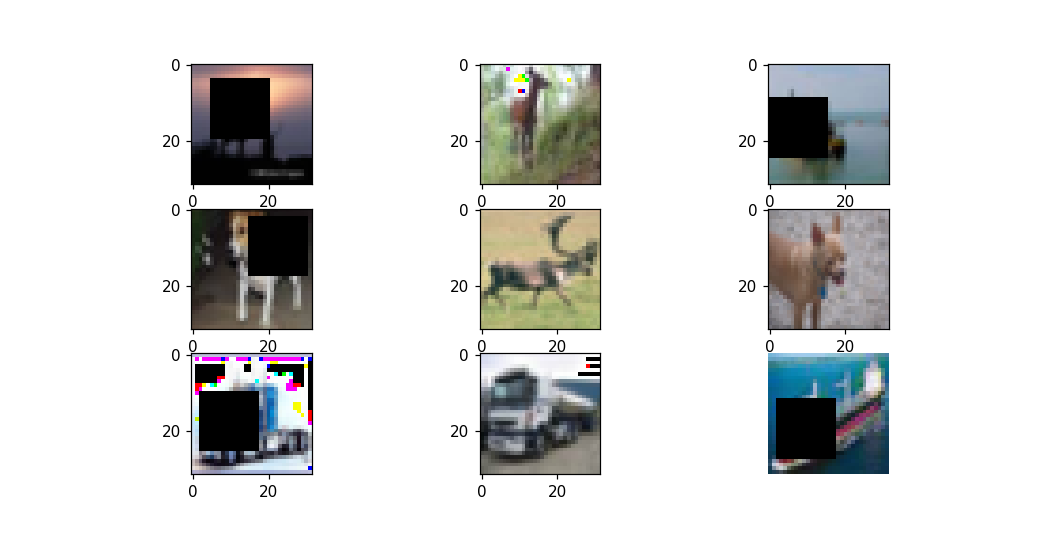

In [5]:
def plot_erased():
    cols, rows = 3, 3
    #Visualizing CIFAR 10
    fig, axes1 = plt.subplots(cols,rows,figsize=(7,7))
    for j in range(cols):
        for i in range(rows):
            axes1[j][i].imshow(eraser(255-x_train[np.random.randint(1000)]), interpolation="nearest")
            
    plt.axis("off")
    plt.show()
    
plot_erased()

In [7]:
# Preprocess data
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

<IPython.core.display.Javascript object>


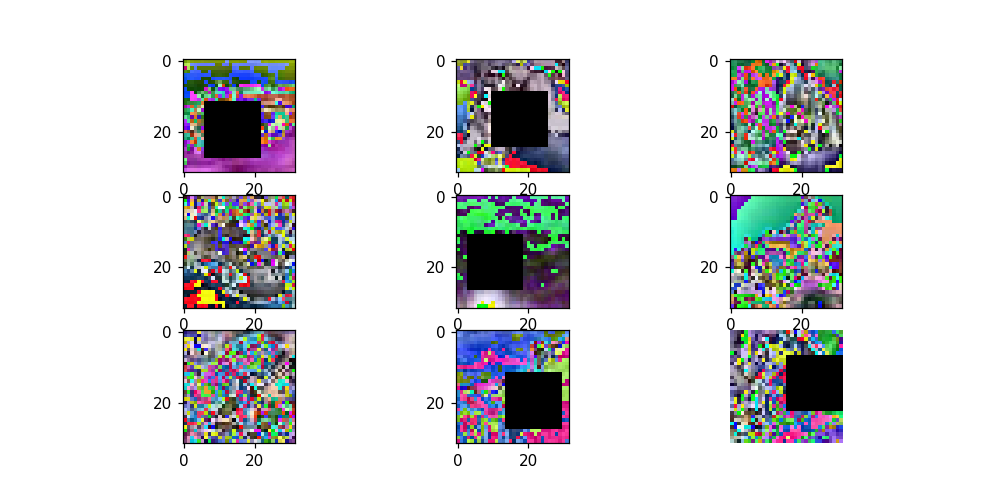

In [8]:
plot_erased()